In [3]:
save_width = 399
save_height = 399
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

In [4]:
from keras.models import load_model
model = load_model(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\SIGN_MNIST_model_SGD.h5')

In [5]:
class_names=['A','S']

In [79]:
# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        # save the frame
        raw_frames_type_3.append(frame)
        print('3 key pressed - Saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        # save the frame
        raw_frames_type_4.append(frame)
        print('4 key pressed - Saved TYPE_4 frame')

camera.release()
cv2.destroyAllWindows()

1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
2 key pressed - Saved TYPE_2 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
3 key pressed - Saved TYPE_3 frame
4 key pressed - Saved TYPE_4 frame
4 key pressed - Saved TYPE_4 frame
4 key pressed - Saved TYPE_4 frame
4 key pressed - Save

In [15]:

import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing


In [72]:
for i in range(1, 5):
    name = r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_{}'.format(i)
    os.makedirs(name, exist_ok=True)

In [80]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    #roi = np.reshape(roi, (128, 128, 1))
    roi = cv2.resize(roi, (128, 128))
    cv2.imwrite(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_1\{}.png'.format(i),roi)

for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    #roi = np.reshape(roi, (128, 128, 1))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (128, 128))
    cv2.imwrite(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_2\{}.png'.format(i),roi)

for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    #roi = np.reshape(roi, (128, 128, 1))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (128, 128))
    cv2.imwrite(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_3\{}.png'.format(i),roi)

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
   # roi = np.reshape(roi, (128, 128, 1))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (128, 128))
    print(roi.shape)
    cv2.imwrite(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_4\{}.png'.format(i),roi)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


In [18]:
import os
import random
from glob import glob
from keras import preprocessing

In [81]:
width = 128
height = 128
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [82]:
images_type_1 = load_images(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_1')
images_type_2 = load_images(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_2')
images_type_3 = load_images(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_3')
images_type_4 = load_images(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_4')

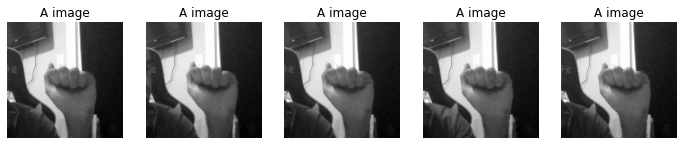

In [83]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

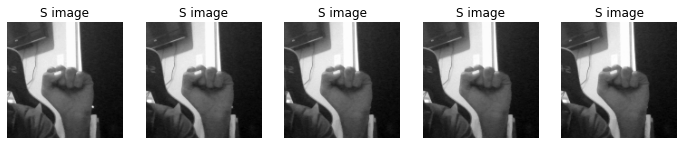

In [84]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

In [98]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)
X_type_4 = np.array(images_type_4)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)
print(X_type_4.shape)

x_type_1_reshaped = []
x_type_2_reshaped = []
x_type_3_reshaped = []
x_type_4_reshaped = []
for image  in X_type_1:
    #img_gray = np.mean(image, axis=1)
    x_type_1_reshaped.append(np.mean(image, axis = 2))
for image  in X_type_2:
    #img_gray = np.mean(image, axis=1)
    x_type_2_reshaped.append(np.mean(image, axis = 2))

for image  in X_type_3:
    #img_gray = np.mean(image, axis=1)
    x_type_3_reshaped.append(np.mean(image, axis = 2))

for image  in X_type_4:
    #img_gray = np.mean(image, axis=1)
    x_type_4_reshaped.append(np.mean(image, axis = 2))

    
    
x_type_1_reshaped = np.array(x_type_1_reshaped)
x_type_2_reshaped = np.array(x_type_2_reshaped)
x_type_3_reshaped = np.array(x_type_3_reshaped)
x_type_4_reshaped = np.array(x_type_4_reshaped)

print(x_type_1_reshaped.shape)
print(x_type_2_reshaped.shape)
print(x_type_3_reshaped.shape)
print(x_type_4_reshaped.shape)



#img_rgb = np.random.rand(196,256,3)
#print('RGB image shape:', img_rgb.shape)


#img_gray = np.mean(img_rgb, axis=1)
#print('Grayscale image shape:', img_gray.shape)

#img_gray = np.mean(X_type_1, axis=1)
#print(img_gray.shape)

(9, 128, 128, 3)
(8, 128, 128, 3)
(8, 128, 128, 3)
(9, 128, 128, 3)
(9, 128, 128)
(8, 128, 128)
(8, 128, 128)
(9, 128, 128)


In [99]:
X = np.concatenate((x_type_1_reshaped, x_type_2_reshaped ,x_type_3_reshaped, x_type_4_reshaped ), axis=0)


In [100]:
X = X / 255.

X.shape

(34, 128, 128)

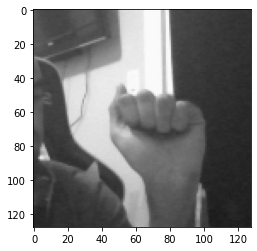

(1, 128, 128)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


IndexError: list index out of range

In [118]:
type_1 = preprocessing.image.load_img(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\images_type_1\0.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X_arr = []
type_1_X = np.expand_dims(type_1, axis=0)

for image in type_1_X:
    type_1_X_arr.append(np.mean(image, axis = 2))
    
type_1_X_arr = np.array(type_1_X_arr)
#ype_1_X = np.mean(type_1_X, axis = 2)
print(type_1_X_arr.shape)
predictions = model.predict(type_1_X_arr)
print(predictions)
print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))